In [1]:
import pandas as pd

test = pd.read_csv("test (1).csv")

train = pd.read_csv('train (1).csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

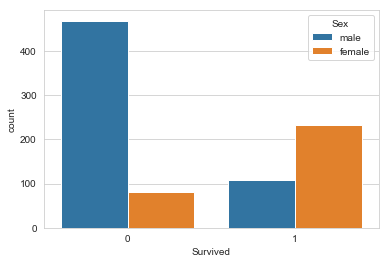

In [4]:
sns.set_style('whitegrid')
sns.countplot('Survived',data = train,hue='Sex')
plt.show()

# females have a better chance of survival

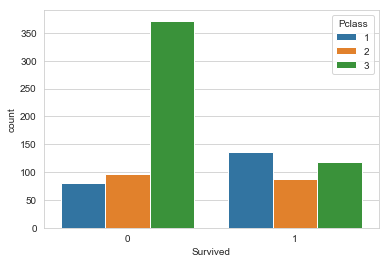

In [5]:
sns.countplot("Survived",data = train,hue = 'Pclass')
sns.set_style('whitegrid')
plt.show()

# passenger class 1 have better chance of survival

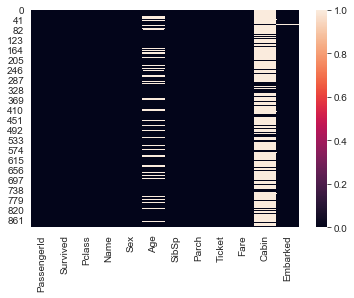

In [6]:
sns.heatmap(train.isnull())
plt.show()

# we can see that age and cabin has null values and cabin contains more null values

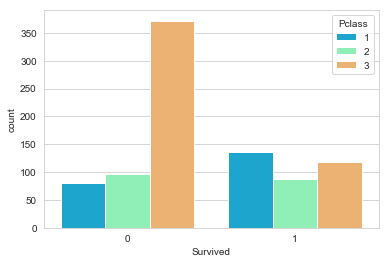

In [7]:
sns.countplot('Survived',data = train,hue = 'Pclass',palette = 'rainbow')

# Pclass 1 has more survival rate and Pclass 3 being least

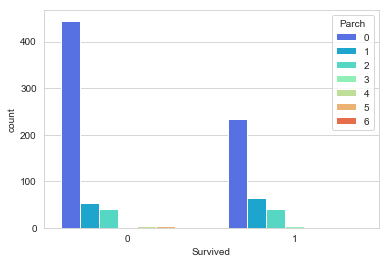

In [8]:
sns.countplot('Survived',data = train,hue = 'Parch',palette = 'rainbow')

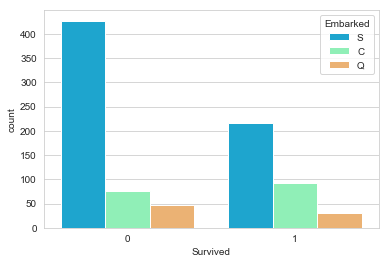

In [9]:
sns.countplot('Survived',data = train,hue = 'Embarked',palette = 'rainbow')

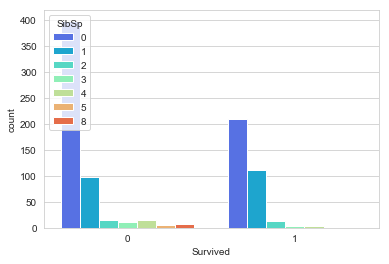

In [10]:
sns.countplot('Survived',data = train,hue = 'SibSp',palette = 'rainbow')

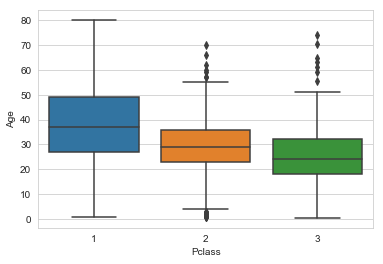

In [11]:
sns.boxplot(x = 'Pclass' , y = 'Age' , data = train)

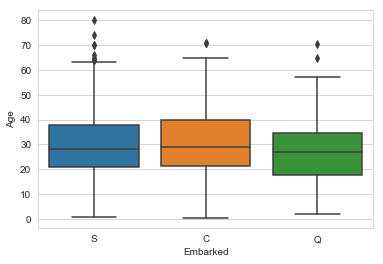

In [12]:
sns.boxplot(x = 'Embarked',y = 'Age',data = train)

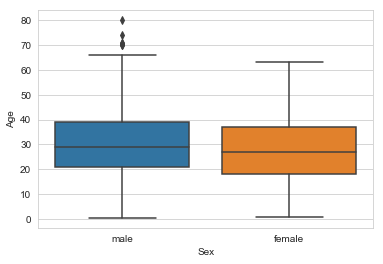

In [13]:
sns.boxplot(x = 'Sex' , y = 'Age' ,data = train)

# as we can see pclass and gender are good parameters to impute age as it varies most w.r.t pclass and gender

In [14]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [15]:
train.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [16]:
train.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [17]:
def ImputeAge(column):
    Age = column[0]
    Sex = column[1]
    Pclass=column[2]

    if pd.isnull(Age):
        if Sex == 'male' and Pclass==1:
            return 41
        elif Sex == 'male' and Pclass==2:
            return 31
        elif Sex == 'male' and Pclass==3:
            return 26
        elif Sex == 'female' and Pclass==1:
            return 35
        elif Sex == 'female' and Pclass==2:
            return 29
        else:
            return 22
    else:
        return Age
    
train['Age'] = train[['Age','Sex','Pclass']].apply(ImputeAge,axis=1)
test['Age'] = test[['Age','Sex','Pclass']].apply(ImputeAge,axis=1)

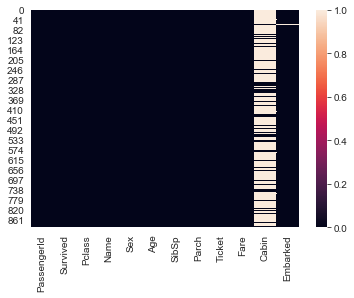

In [18]:
sns.heatmap(train.isnull())

# now let us drop the cabin column as it seems to have mostly the null values 

In [19]:
train = train.drop('Cabin',axis = 1)
test = test.drop('Cabin',axis = 1)

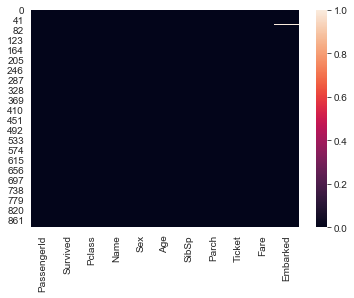

In [20]:
sns.heatmap(train.isnull())

In [21]:
import numpy as np
train['Embarked'] = train['Embarked'].replace(np.NaN,'S')

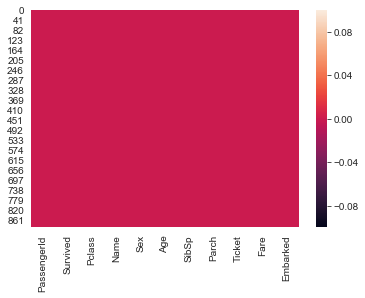

In [22]:
sns.heatmap(train.isnull())

# its plain every where 

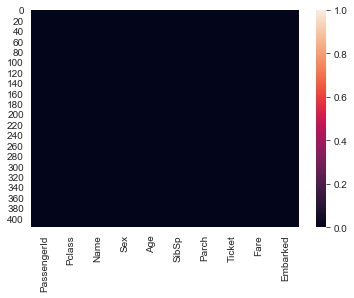

In [23]:
sns.heatmap(test.isnull())

# fare has 1 missing value

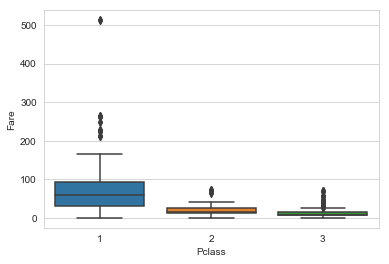

In [24]:
sns.boxplot(x = 'Pclass',y = 'Fare',data = train)

# wow!!! excellent deviation we can fill that 1 value w.r.t pclass

In [25]:
train.groupby('Pclass')['Age']

In [26]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

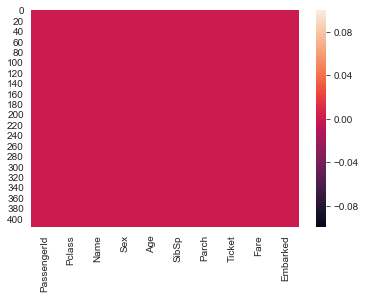

In [27]:
sns.heatmap(test.isnull())

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [30]:
train['Sex'] = train['Sex'].replace('male',1)

In [31]:
train['Sex'] = train['Sex'].replace('female',0)

In [32]:
test['Sex'] = test['Sex'].replace('female',0)

In [33]:
test['Sex'] = test['Sex'].replace('male',1)

In [34]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [35]:
train['Embarked'] = train['Embarked'].replace('S',0)

In [36]:
train['Embarked'] = train['Embarked'].replace('C',1)

In [37]:
train['Embarked'] = train['Embarked'].replace('Q',2)

In [38]:
test['Embarked'] = test['Embarked'].replace('S',0)

In [39]:
test['Embarked'] = test['Embarked'].replace('C',1)

In [40]:
test['Embarked'] = test['Embarked'].replace('Q',2)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


# now droping the useless columns i.e; passenger id,ticket,name

In [42]:
train = train.drop(['PassengerId','Name','Ticket'],axis=1)

In [43]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


# by this we completed data exploration

# MODEL #

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x = train.drop('Survived',axis = 1)

In [46]:
y = train['Survived']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 50)

In [48]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log


81.46

In [49]:
acc_log_test = round(logreg.score(x_test, y_test) * 100, 2)
acc_log_test

80.45

In [50]:
# Decision Tree Classifier
from sklearn import tree

treeclf = tree.DecisionTreeRegressor()
treeclf.fit(x_train,y_train)
acc_tree = round(treeclf.score(x_train, y_train) * 100, 2)
acc_tree

95.84

In [51]:
acc_tree_test = round(treeclf.score(x_test, y_test) * 100, 2)
acc_tree_test

5.79

In [52]:
from sklearn.ensemble import RandomForestClassifier

ranclf =RandomForestClassifier(n_estimators=20, max_depth=None,min_samples_split=2, random_state=0)
ranclf.fit(x_train,y_train)
acc_ranclf = round(ranclf.score(x_train, y_train) * 100, 2)
acc_ranclf

98.17

In [53]:
acc_ranclf = round(ranclf.score(x_test, y_test) * 100, 2)
acc_ranclf

82.12

# hyper parameter optimization

In [54]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [55]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = ranclf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=20,
                                                    n_jobs=None,
  

In [56]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [57]:
cls = RandomForestClassifier(n_estimators= 400,
 min_samples_split= 10,
 min_samples_leaf= 4,
 max_features= 'sqrt',
 max_depth= 80,
 bootstrap= False)

In [58]:
cls.fit(x,y)
print(cls.score(x,y))
print(cls.score(x_test,y_test))

0.9023569023569024
0.88268156424581


# randomforest seems to be our best classifier 